## Data Pre-Processing.

In [79]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
df = pd.read_csv('diabetes_data_upload.csv')

In [81]:
# Changing Postive to 1 and Negative to  in the 'Class' column
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [82]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [83]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [84]:
#Label Encoding for object to numeric conversion and hence the data types will change to int64
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [85]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [86]:
# Correlation between the features.
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

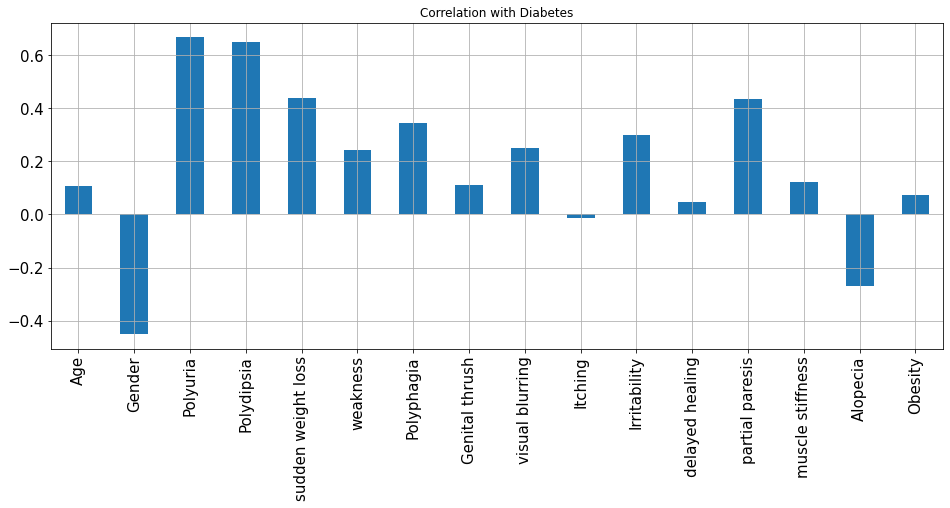

In [87]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [88]:
# using Binarizer to change Age values to binary values.
bin = Binarizer(threshold=35)
col = X['Age'].values
col = col.reshape(-1, 1)
bin.fit_transform(col)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [89]:
# all binary values
X['Age'] = bin.fit_transform(col)
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


## Train and Test Split.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [91]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    258
0    158
Name: class, dtype: int64
Distribution of target variable in test set
1    62
0    42
Name: class, dtype: int64


In [92]:
# Feature Selection.
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [93]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# Building the models for prediction.

In [94]:
# Spot-Checking Algorithms to use
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'DT' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
# evaluating each model in turn, using 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
# Output are mean and starndard deviation accuracies.
results = []
names = []
for name, model in models:
    seed = 7
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.922880 (0.052989)
RF: 0.978455 (0.022475)
KNN: 0.922764 (0.046174)
DT: 0.968815 (0.030342)
NB: 0.891696 (0.052544)
SVM: 0.959350 (0.039910)


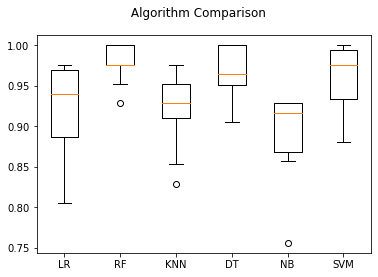

In [95]:
# Algorithm comparison on the spread and mean accuracy for each model.
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [96]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9519230769230769
[[38  4]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.94      0.98      0.96        62

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



## ROC curve.

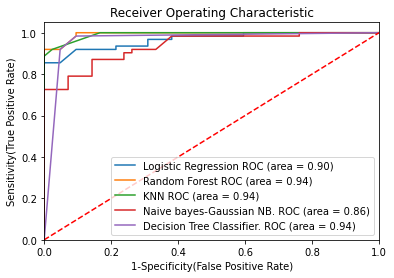

In [97]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    {
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
    },

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=7),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
    
    
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Using pipelines.

In [98]:
# using pipelines to standardise data to avoid leakage and build the model for each fold in the cross validation test ahrness.
# this is ine of the methods to improve model performance.
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
LogisticRegression())])))
pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'Rf' ,
RandomForestClassifier())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
KNeighborsClassifier())])))
pipelines.append(( 'ScaledDT' , Pipeline([( 'Scaler' , StandardScaler()),( 'DT' ,
DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.930430 (0.030822)
ScaledRF: 0.975958 (0.010652)
ScaledKNN: 0.911150 (0.044639)
ScaledDT: 0.975900 (0.024161)
ScaledNB: 0.906272 (0.031264)
ScaledSVM: 0.973577 (0.016803)


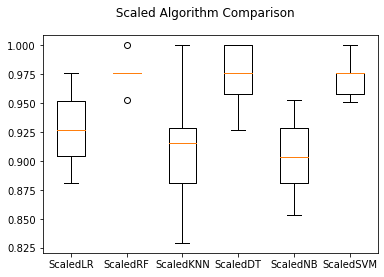

In [99]:
# plotting the distribution of the accuracy scores using box and whisker plots.
# Comparing Algorithms
fig = plt.figure()
fig.suptitle( ' Scaled Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Selection of the best two models using the Box ad whisker plot above.

In [100]:
## tuning the parameters for two algorithms that show promise from section above: Random Forests and Decision trees.

## Tuning the scaled models.

In [110]:
# Tuning scaled Random forests to improve accuracy.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
estimators = [50, 100, 150, 200, 250, 300, 350]
param_grid = dict(n_estimators=estimators)
model1 = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980720 using {'n_estimators': 200}
0.978339 (0.007225) with: {'n_estimators': 50}
0.975958 (0.010652) with: {'n_estimators': 100}
0.978339 (0.012868) with: {'n_estimators': 150}
0.980720 (0.009643) with: {'n_estimators': 200}
0.975958 (0.010652) with: {'n_estimators': 250}
0.973577 (0.012782) with: {'n_estimators': 300}
0.975958 (0.015061) with: {'n_estimators': 350}


In [112]:
# Tuning scaled Decision Trees to improve accuracy.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = dict(max_depth=max_depth)
model2 = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(model2, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980720 using {'max_depth': 8}
0.800407 (0.024609) with: {'max_depth': 1}
0.860511 (0.041768) with: {'max_depth': 2}
0.891928 (0.042876) with: {'max_depth': 3}
0.918118 (0.032981) with: {'max_depth': 4}
0.951974 (0.030353) with: {'max_depth': 5}
0.954297 (0.027397) with: {'max_depth': 6}
0.971196 (0.020974) with: {'max_depth': 7}
0.980720 (0.021211) with: {'max_depth': 8}
0.980662 (0.023746) with: {'max_depth': 9}
0.978281 (0.022865) with: {'max_depth': 10}


## Using Ensemble methods.

In [113]:
# Ensemble methods to improve on the accuracy.
ensembles = []
ensembles.append(( ' AB ' , AdaBoostClassifier()))
ensembles.append(( ' GBM ' , GradientBoostingClassifier()))
ensembles.append(( ' RF ' , RandomForestClassifier()))
ensembles.append(( ' ET ' , ExtraTreesClassifier()))
ensembles.append(( ' XGB ' , XGBClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 AB : 0.903949 (0.030044)
 GBM : 0.971080 (0.018194)
 RF : 0.978339 (0.007225)
 ET : 0.985540 (0.011809)
[15:45:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

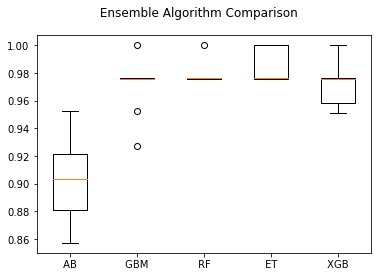

In [114]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle( ' Ensemble Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [115]:
# The results above suggest Extra tress may be worthy of further study, with a strong mean and a spread that skews up towards high 98s (%) in accuracy.

## Selection of the best model among the 3 models ie Random forests, Decision tree and extra tree classifier.

In [116]:
# finalising the model though choosing Decision trees classifier as the best model.
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_ETC = ExtraTreesClassifier()

model_ETC.fit(rescaledX, y_train)
# estimate accuracy on test dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_DT.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9326923076923077
[[40  2]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.92      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.93      0.93      0.93       104



## Saving the model.

In [108]:
# saving the model.
file = open('ETC.pkl', 'wb')
pickle.dump(model_ETC, file)
file.close()